<a href="https://colab.research.google.com/github/revs1/Janatahack---AV-Hackathon-Topic-Modelling/blob/master/topic_modelling_merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from datetime import datetime

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

import zipfile
from google.colab import files
uploaded1 = files.upload()

Saving sample_submission_UVKGLZE.csv to sample_submission_UVKGLZE.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import io
df_test= pd.read_csv(io.BytesIO(uploaded1['test.csv']))
df_submit = pd.read_csv(io.BytesIO(uploaded1['sample_submission_UVKGLZE.csv']))
df_train = pd.read_csv(io.BytesIO(uploaded1['train.csv']))

In [ ]:
df_test.head()

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [ ]:
df_train.shape

(20972, 9)

In [ ]:
df_train1=df_train.copy()

In [ ]:
df_train1=df_train1.drop(['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance'],axis=1)

In [ ]:

df= pd.concat([df_train1,df_test])

In [ ]:

print('number of titles:', df['TITLE'].nunique())

number of titles: 29961


In [ ]:
df.isna().sum()

ID          0
TITLE       0
ABSTRACT    0
dtype: int64

# Topic Modelling

In [ ]:

#Installing the libraries
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 16.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=5c0e959a8d4580a0e3f1993c636582fc5fa467bdee46464b59981368c244cf3e
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=366f46b3d262be1224e33949e59074c74d679c017f50b79c453289364346357d
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:

!pip install gensim --upgrade

     |████████████████████████████████| 24.2MB 1.4MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2020-08-21 16:03:35--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  18.4MB/s    in 0.8s    

2020-08-21 16:03:36 (18.4 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [ ]:
import os

In [ ]:

df.head()

,ID,TITLE,ABSTRACT
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...


In [ ]:

os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
#Topic modeling
# spacy for lemmatization
import spacy;
import en_core_web_sm
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
#text preprocessing
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')

#hide warning
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df.columns

Index(['ID', 'TITLE', 'ABSTRACT'], dtype='object')

In [ ]:

# tokenize each sentence into a list of words, removing punctuations
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df['ABSTRACT']))

# Remove Stop and common Words
stopwords = nltk.corpus.stopwords.words('english')
# 'home', 'stay','new','york', 'time',
newStopWords =  ['s','t',  'm', 're','don','ve','2', '3', '1', 
                 'it', 'i', 'us', 'get', 'you', 'let', 'going', 'know', 
                'make', 'take', 'still','got', 'can', 'this', 'all', 'me','go',
                'even', 'here', 'well', 'much', 'many', 'way', 'want', 'every', 'little']
stopwords.extend(newStopWords)

data_words = [[word for word in doc if word not in stopwords] for doc in data_words]

In [ ]:
# restrict words to only noun, adjective, verb and adverb
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

## Finding the optimal number of topics using LdaMallet model

In [ ]:
start=24
limit=35
step=2
random = 155

In [ ]:
# Write the function to compute coherence values for each model. 
# This could help us choose how many topics should be included into our model.

def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word,random_seed=random)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# compute coherence values for each model

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

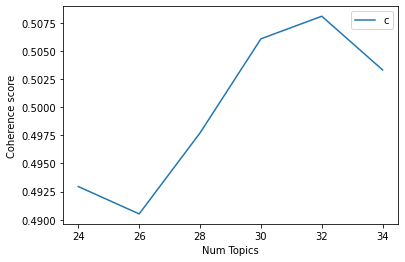

In [ ]:
# plot the coherence values when number of topics equals to different numbers
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
# The graph tell us about what number of topics to choose so we will choose 28 as it has maximum coherence score at that point

In [ ]:

# plot the coherence values when number of topics equals to different numbers
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

#If the coherence score seems to keep increasing, it may make better sense to pick the model that gave the highest CV before flattening out. This is exactly the case here.
#So for further steps I will choose the model with 32 topics itself.

Num Topics = 24  has Coherence Value of 0.4929
Num Topics = 26  has Coherence Value of 0.4905
Num Topics = 28  has Coherence Value of 0.4977
Num Topics = 30  has Coherence Value of 0.5061
Num Topics = 32  has Coherence Value of 0.5081
Num Topics = 34  has Coherence Value of 0.5033


## Finding Key Words for each topic using optimal LdaMallet model¶

In [ ]:
#mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, 
                                             corpus=corpus,
                                             num_topics=32, 
                                             id2word=id2word,
                                             random_seed = 155)

In [ ]:
model_topics = ldamallet.show_topics(formatted=False)

pprint(sorted(ldamallet.print_topics(num_words=4)))

[(2, '0.136*"function" + 0.094*"set" + 0.048*"class" + 0.031*"space"'),
 (3,
  '0.044*"phase" + 0.035*"state" + 0.021*"interaction" + 0.021*"transition"'),
 (4, '0.042*"cluster" + 0.031*"source" + 0.023*"measurement" + 0.022*"high"'),
 (5, '0.059*"group" + 0.056*"space" + 0.023*"metric" + 0.018*"dimension"'),
 (6, '0.076*"result" + 0.053*"work" + 0.042*"provide" + 0.039*"paper"'),
 (7, '0.044*"theory" + 0.029*"give" + 0.029*"operator" + 0.021*"product"'),
 (9,
  '0.173*"problem" + 0.065*"algorithm" + 0.039*"optimization" + 0.035*"solve"'),
 (10,
  '0.045*"user" + 0.024*"information" + 0.017*"communication" + '
  '0.015*"attack"'),
 (11, '0.186*"method" + 0.074*"propose" + 0.073*"approach" + 0.067*"base"'),
 (12, '0.185*"time" + 0.044*"power" + 0.041*"rate" + 0.028*"energy"'),
 (14,
  '0.027*"code" + 0.019*"application" + 0.019*"program" + '
  '0.018*"implementation"'),
 (15, '0.339*"model" + 0.066*"datum" + 0.036*"prediction" + 0.022*"process"'),
 (16, '0.022*"star" + 0.017*"line" + 0.

In [ ]:
pprint(model_topics)

[(15,
  [('model', 0.33931957770796184),
   ('datum', 0.06608927004613513),
   ('prediction', 0.03563442868868699),
   ('process', 0.022105233364467465),
   ('predict', 0.017916277490022926),
   ('inference', 0.017760606832526678),
   ('approach', 0.016784127253686564),
   ('framework', 0.015751040163029632),
   ('real', 0.015496306359853952),
   ('uncertainty', 0.015439698848037135)]),
 (28,
  [('social', 0.020363603281223937),
   ('identify', 0.01898379099634577),
   ('individual', 0.018407605646616428),
   ('decision', 0.016572910190899303),
   ('information', 0.015329562857272824),
   ('human', 0.014586587011569195),
   ('level', 0.01360100680808479),
   ('analysis', 0.012751891555852072),
   ('make', 0.009931615896650543),
   ('treatment', 0.009825476490121453)]),
 (8,
  [('equation', 0.05496229786863095),
   ('solution', 0.04259832338113295),
   ('flow', 0.03475279315404844),
   ('boundary', 0.021081230295369683),
   ('numerical', 0.019802699443548503),
   ('nonlinear', 0.0182917

In [ ]:

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)
#More the coherence score more is better keyword


Coherence Score:  0.5080902317614108


## Dominant topic for each document

In [ ]:
tm_results = ldamallet[corpus]

In [ ]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [ ]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]

In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Topic 30,Topic 31,Topic 32
Term1,structure,point,function,phase,cluster,group,result,theory,equation,problem,user,method,time,distribution,code,model,star,learn,network,magnetic,pattern,graph,bound,image,effect,low,performance,datum,social,system,control,large
Term2,property,order,set,state,source,space,work,give,solution,algorithm,information,propose,power,estimate,application,datum,line,learning,neural,temperature,cell,node,prove,object,change,noise,improve,research,identify,state,environment,number
Term3,type,test,class,interaction,measurement,metric,provide,operator,flow,optimization,communication,approach,rate,sample,program,prediction,find,feature,deep,field,interaction,edge,bind,detection,increase,matrix,good,application,individual,dynamic,agent,scale
Term4,measure,local,space,transition,high,dimension,paper,product,boundary,solve,attack,base,energy,probability,implementation,process,mass,task,input,material,role,tree,give,feature,find,dimensional,design,area,decision,process,policy,small
Term5,study,condition,show,field,light,invariant,present,category,numerical,optimal,channel,technique,long,random,design,predict,observation,machine,layer,spin,process,set,polynomial,base,study,high,strategy,year,information,present,real,size


In [ ]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,Terms per Topic
Topic1,"structure, property, type, measure, study, show, functional, index, introduce, result, include, investigate, principle, entropy, form, associate, relate, concept, characterize, complex"
Topic2,"point, order, test, local, condition, result, show, case, obtain, study, global, correlation, derive, fix, apply, sufficient, weak, limit, hypothesis, strong"
Topic3,"function, set, class, space, show, approximation, case, continuous, discrete, give, result, generalize, general, variable, paper, obtain, extend, introduce, family, define"
Topic4,"phase, state, interaction, transition, field, mode, quantum, couple, topological, symmetry, regime, wave, lattice, energy, particle, dimensional, theory, spin, potential, coupling"
Topic5,"cluster, source, measurement, high, light, field, present, measure, detector, matter, optical, resolution, dark, signal, background, detection, observation, frequency, beam, sensitivity"
Topic6,"group, space, metric, dimension, invariant, map, prove, curve, manifold, compact, lie, give, surface, geometry, complex, curvature, geometric, variety, construct, define"
Topic7,"result, work, provide, paper, present, analysis, main, question, study, part, recent, simple, open, important, theoretical, previous, discuss, focus, answer, contribution"
Topic8,"theory, give, operator, product, category, formula, proof, algebra, prove, construction, relation, define, representation, form, free, construct, classical, order, theorem, notion"
Topic9,"equation, solution, flow, boundary, numerical, nonlinear, wave, condition, differential, domain, perturbation, particle, simulation, initial, force, fluid, dimensional, velocity, potential, law"
Topic10,"problem, algorithm, optimization, solve, optimal, gradient, solution, stochastic, constraint, convergence, guarantee, objective, cost, complexity, formulation, variant, linear, iteration, approximate, formulate"


In [ ]:

topics_df.to_csv('topics_df.csv') 
files.download('topics_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# create a dataframe
corpus_topic_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_df['TITLE'] = df.TITLE
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df.head()

,TITLE,Dominant Topic,Contribution %,Topic Terms
0,Reconstructing Subject-Specific Effect Maps,29,12.70,"social, identify, individual, decision, information, human, level, analysis, make, treatment, subject, outcome, patient, rule, medium, risk, influence, record, people, online"
1,Rotation Invariance Neural Network,24,9.66,"image, object, detection, feature, base, visual, propose, dataset, shape, approach, spatial, method, map, generate, video, information, detect, face, frame, pose"
2,Spherical polyharmonics and Poisson kernels for polyharmonic functions,23,15.17,"bound, prove, bind, give, polynomial, number, constant, alpha, positive, leave, mathcal, case, sum, omega, mathbb, result, gamma, sequence, show, upper"
3,A finite element approximation for the stochastic Maxwell--Landau--Lifshitz--Gilbert system,9,14.35,"equation, solution, flow, boundary, numerical, nonlinear, wave, condition, differential, domain, perturbation, particle, simulation, initial, force, fluid, dimensional, velocity, potential, law"
4,Comparative study of Discrete Wavelet Transforms and Wavelet Tensor Train decomposition to feature extraction of FTIR data of medicinal plants,18,13.92,"learn, learning, feature, task, machine, dataset, classification, datum, training, domain, train, label, deep, representation, art, performance, classifier, adversarial, loss, propose"


In [ ]:
corpus_topic_df.to_csv('corpus_topic_df.csv') 
files.download('corpus_topic_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
corpus_topic_df.shape

(29961, 5)

In [ ]:
df_train.shape

(20972, 9)

In [ ]:
df_test.shape

(8989, 3)

In [ ]:
20972+8989

29961

In [ ]:
def format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=df["TITLE"]):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num+1), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = sent_topics_df.join(contents)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=df["TITLE"])
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'TITLE']

# Show

In [ ]:
df_dominant_topic.head()

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,TITLE
0,0,0,29.0,0.1270,"social, identify, individual, decision, inform...",Reconstructing Subject-Specific Effect Maps
1,1,0,29.0,0.1270,"social, identify, individual, decision, inform...",Closed-form Marginal Likelihood in Gamma-Poiss...
2,2,1,24.0,0.0966,"image, object, detection, feature, base, visua...",Rotation Invariance Neural Network
3,3,1,24.0,0.0966,"image, object, detection, feature, base, visua...",Laboratory mid-IR spectra of equilibrated and ...
4,4,2,23.0,0.1517,"bound, prove, bind, give, polynomial, number, ...",Spherical polyharmonics and Poisson kernels fo...


In [ ]:
df_dominant_topic.to_csv('df_dominant_topic.csv') 
files.download('df_dominant_topic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''#labels=[Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance]
#Labeling the Topics
def label_Topics(Dominant_Topic):
    if(Dominant_Topic==1.0 or Dominant_Topic==17.0 or Dominant_Topic==14.0 or Dominant_Topic==23.0 or Dominant_Topic==18.0 or Dominant_Topic==2.0 or Dominant_Topic==3.0 or Dominant_Topic==7.0 or Dominant_Topic==10.0 or Dominant_Topic==21.0):
        return("Computer Science")
    elif(Dominant_Topic==5.0 or Dominant_Topic==8.0 or Dominant_Topic==11.0 or Dominant_Topic==24.0 or Dominant_Topic==25.0  or Dominant_Topic==26.0):
        return("Physics")
    elif(Dominant_Topic==12.0 or Dominant_Topic==19.0 or Dominant_Topic==20.0 or Dominant_Topic==22.0):
        return("Mathematics")
    elif(Dominant_Topic==4.0 or Dominant_Topic==9.0 or Dominant_Topic==13.0 or Dominant_Topic==16.0 ):
        return("Statistics")
    elif(Dominant_Topic==6.0 ):
        return("Quantitative Biology")
    elif(Dominant_Topic==15.0 ):
        return("Quantitative Finance")
df_dominant_topic["labels"]=df_dominant_topic["Dominant_Topic"].apply(label_Topics)'''

In [ ]:
df_dominant_topic.shape

(38950, 6)

In [ ]:
df_train.shape

(20972, 9)

In [ ]:
df_dominant_topic=corpus_topic_df.copy()

In [ ]:
df_merged= pd.merge(df_train,df_dominant_topic, on=["TITLE"])

In [ ]:
df_merged.shape

(20972, 13)

In [ ]:
df_merged.head(10)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,0,0,29.0,0.1270,"social, identify, individual, decision, inform..."
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,2,1,24.0,0.0966,"image, object, detection, feature, base, visua..."
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,4,2,23.0,0.1517,"bound, prove, bind, give, polynomial, number, ..."
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,6,3,9.0,0.1435,"equation, solution, flow, boundary, numerical,..."
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,8,4,18.0,0.1392,"learn, learning, feature, task, machine, datas..."
5,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0,10,5,23.0,0.3526,"bound, prove, bind, give, polynomial, number, ..."
6,7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...,0,1,0,0,0,0,12,6,17.0,0.1575,"star, line, find, mass, observation, gas, form..."
7,8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...,0,1,0,0,0,0,14,7,20.0,0.3030,"magnetic, temperature, field, material, spin, ..."
8,9,SPH calculations of Mars-scale collisions: the...,We model large-scale ($\approx$2000km) impac...,0,1,0,0,0,0,16,8,25.0,0.1566,"effect, change, increase, find, study, show, e..."
9,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1,0,18,9,21.0,0.1864,"pattern, cell, interaction, role, process, stu..."


In [ ]:
df_merged.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance',
       'Unnamed: 0', 'Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib',
       'Keywords'],
      dtype='object')

In [ ]:
df_merged1=df_merged.drop(['Dominant_Topic','ABSTRACT'],axis=1)

In [ ]:
df_merged2=df_merged1.drop(['TITLE'],axis=1)

In [ ]:
df_merged2.head(30)

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Unnamed: 0,Contribution %,Topic Terms
0,1,1,0,0,0,0,0,0,12.70,"social, identify, individual, decision, inform..."
1,2,1,0,0,0,0,0,1,9.66,"image, object, detection, feature, base, visua..."
2,3,0,0,1,0,0,0,2,15.17,"bound, prove, bind, give, polynomial, number, ..."
3,4,0,0,1,0,0,0,3,14.35,"equation, solution, flow, boundary, numerical,..."
4,5,1,0,0,1,0,0,4,13.92,"learn, learning, feature, task, machine, datas..."
5,6,0,0,1,0,0,0,5,35.26,"bound, prove, bind, give, polynomial, number, ..."
6,7,0,1,0,0,0,0,6,15.75,"star, line, find, mass, observation, gas, form..."
7,8,0,1,0,0,0,0,7,30.30,"magnetic, temperature, field, material, spin, ..."
8,9,0,1,0,0,0,0,8,15.66,"effect, change, increase, find, study, show, e..."
9,10,0,0,0,0,1,0,9,18.64,"pattern, cell, interaction, role, process, stu..."


In [ ]:
import zipfile
from google.colab import files
uploaded1 = files.upload()

Saving corpus_topic_df.csv to corpus_topic_df.csv
Saving df_dominant_topic.csv to df_dominant_topic.csv
Saving df_final.csv to df_final.csv
Saving df_merged_test_updated.csv to df_merged_test_updated.csv
Saving df_use.csv to df_use.csv
Saving topics_df (1).csv to topics_df (1).csv


In [ ]:

import io
corpus_topic_df = pd.read_csv(io.BytesIO(uploaded1['corpus_topic_df.csv']))
df_dominant_topic = pd.read_csv(io.BytesIO(uploaded1['df_dominant_topic.csv']))
topics_df = pd.read_csv(io.BytesIO(uploaded1['topics_df (1).csv']))

In [ ]:
# Converting binary column to category
to_convert = ['Computer Science', 'Physics', 'Mathematics','Statistics', 'Quantitative Biology', 'Quantitative Finance']

# Make a copy of train data
topic_data = df_merged2.copy()

In [ ]:
# Changing the binary fields to categorical fields
topic_data = topic_data[topic_data[to_convert]==1].stack().reset_index().drop(0,1)

topic_data['ID'] = topic_data['level_0'].apply(lambda x: x+1)
topic_data = topic_data.drop('level_0', axis=1)

# Merge the data based on ID
merge_data = df_merged2.merge(topic_data, how='left', on='ID' )
# Drop all the binary fields
merge_data = merge_data.drop(to_convert, axis=1)

In [ ]:
merge_data.head(50)

,ID,Unnamed: 0,Document_No,Topic_Perc_Contrib,Keywords,level_1
0,1,0,0,0.1270,"social, identify, individual, decision, inform...",Computer Science
1,2,2,1,0.0966,"image, object, detection, feature, base, visua...",Computer Science
2,3,4,2,0.1517,"bound, prove, bind, give, polynomial, number, ...",Mathematics
3,4,6,3,0.1435,"equation, solution, flow, boundary, numerical,...",Mathematics
4,5,8,4,0.1392,"learn, learning, feature, task, machine, datas...",Computer Science
5,5,8,4,0.1392,"learn, learning, feature, task, machine, datas...",Statistics
6,6,10,5,0.3526,"bound, prove, bind, give, polynomial, number, ...",Mathematics
7,7,12,6,0.1575,"star, line, find, mass, observation, gas, form...",Physics
8,8,14,7,0.3030,"magnetic, temperature, field, material, spin, ...",Physics
9,9,16,8,0.1566,"effect, change, increase, find, study, show, e...",Physics


In [ ]:

pivot = pd.pivot_table(merge_data, index=['Keywords'],
                         columns=['level_1'],
                          
                         aggfunc = np.count_nonzero, 
                         fill_value=0)


'''fig= plt.figure(figsize = (20,15))
plt.stackplot(sorted(df['month_year'].unique()), pivot.values, labels = pivot.index)
ax = plt.gca()
ax.set_xticks(sorted(df['month_year']))
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.title('Number of Tweets in Different Cities Groups across months')'''

"fig= plt.figure(figsize = (20,15))\nplt.stackplot(sorted(df['month_year'].unique()), pivot.values, labels = pivot.index)\nax = plt.gca()\nax.set_xticks(sorted(df['month_year']))\nplt.xticks(rotation=45)\nplt.legend(loc='upper left')\n\nplt.title('Number of Tweets in Different Cities Groups across months')"

In [ ]:
pivot.head()

Document_No  ... Unnamed: 0
level_1                                            Computer Science  ... Statistics
Keywords                                                             ...           
bound, prove, bind, give, polynomial, number, c...              255  ...         88
cluster, source, measurement, high, light, fiel...               41  ...         19
code, application, program, implementation, des...              679  ...         85
control, environment, agent, policy, real, robo...              711  ...        159
datum, research, application, area, year, artic...              480  ...        163

[5 rows x 24 columns]

In [ ]:
pivot.to_csv('pivot.csv') 
files.download('pivot.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merge_data.columns

Index(['ID', 'Unnamed: 0', 'Contribution %', 'Topic Terms', 'level_1'], dtype='object')

In [ ]:
example = merge_data.groupby(["Topic Terms","level_1"]).count()

In [ ]:
example.head(10)

ID  ...  Contribution %
Topic Terms                                        level_1                    ...                
bound, prove, bind, give, polynomial, number, c... Computer Science      255  ...             255
                                                   Mathematics           760  ...             760
                                                   Physics                21  ...              21
                                                   Quantitative Biology    1  ...               1
                                                   Quantitative Finance    2  ...               2
                                                   Statistics             88  ...              88
cluster, source, measurement, high, light, fiel... Computer Science       41  ...              41
                                                   Mathematics             7  ...               7
                                                   Physics               699  ...             699
                                                   Quantitative Biology    3  ...               3

[10 rows x 3 columns]

In [ ]:
example = merge_data.groupby(["Topic Terms","level_1"]).count().sort_values("ID").groupby(level=0).tail(1)
        

In [ ]:
example.head(100)

,,ID,Unnamed: 0,Contribution %
Topic Terms,level_1,,,
"large, number, scale, small, size, parameter, factor, show, find, result, limit, range, ratio, length, degree, depend, study, grow, expect, require",Physics,45,45,45
"structure, property, type, measure, study, show, functional, index, introduce, result, include, investigate, principle, entropy, form, associate, relate, concept, characterize, complex",Mathematics,65,65,65
"result, work, provide, paper, present, analysis, main, question, study, part, recent, simple, open, important, theoretical, previous, discuss, focus, answer, contribution",Mathematics,73,73,73
"effect, change, increase, find, study, show, event, due, lead, investigate, observe, response, region, result, difference, impact, decrease, significant, relative, shift",Physics,102,102,102
"point, order, test, local, condition, result, show, case, obtain, study, global, correlation, derive, fix, apply, sufficient, weak, limit, hypothesis, strong",Mathematics,108,108,108
"system, state, dynamic, process, present, describe, component, stability, dynamical, configuration, stable, physical, equilibrium, behavior, critical, show, consist, initial, hybrid, provide",Computer Science,108,108,108
"method, propose, approach, base, technique, scheme, develop, accuracy, apply, computational, compare, efficient, demonstrate, step, paper, error, application, exist, accurate, experiment",Computer Science,119,119,119
"time, power, rate, energy, long, term, high, low, short, speed, average, level, fast, show, result, reduce, series, grid, delay, simulation",Computer Science,133,133,133
"performance, improve, good, design, strategy, base, propose, achieve, game, selection, show, compare, multi, quality, experiment, select, evaluation, efficiency, high, result",Computer Science,186,186,186


In [ ]:
example.shape

(32, 3)

In [ ]:
example.columns

Index(['ID', 'Unnamed: 0', 'Contribution %'], dtype='object')

In [ ]:
df_use=example.drop(['ID', 'Unnamed: 0', 'Contribution %'],axis=1)

In [ ]:
df_use.head(0)

,
Topic Terms,level_1


In [ ]:
df_use.shape

(32, 0)

In [ ]:
df_use.to_csv('df_use.csv') 
files.download('df_use.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import zipfile
from google.colab import files
uploaded2 = files.upload()

Saving df_use.csv to df_use (1).csv


In [ ]:
import io
df_use= pd.read_csv(io.BytesIO(uploaded2['df_use.csv']))

In [ ]:
df_use.head()

,Keywords,level_1
0,"large, number, scale, small, size, parameter, ...",Physics
1,"structure, property, type, measure, study, sho...",Mathematics
2,"result, work, provide, paper, present, analysi...",Mathematics
3,"effect, change, increase, find, study, show, e...",Physics
4,"point, order, test, local, condition, result, ...",Mathematics


In [ ]:
df_use.shape

(32, 2)

In [ ]:
df_use.columns

Index(['Keywords', 'level_1'], dtype='object')

In [ ]:
df_use.head()

,Keywords,labels
0,"large, number, scale, small, size, parameter, ...",Physics
1,"structure, property, type, measure, study, sho...",Mathematics
2,"result, work, provide, paper, present, analysi...",Mathematics
3,"effect, change, increase, find, study, show, e...",Physics
4,"point, order, test, local, condition, result, ...",Mathematics


In [ ]:
df_use.to_csv('df_use.csv') 
files.download('df_use.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Applying our results to test dataset

In [ ]:
df_dominant_topic.shape

(29961, 5)

In [ ]:
df_dominant_topic=corpus_topic_df.copy()

In [ ]:
df_dominant_topic.tail(50)

,Unnamed: 0,TITLE,Dominant Topic,Contribution %,Topic Terms
29911,8939,Wavepacket Dynamics in One-Dimensional System ...,4,16.41,"phase, state, interaction, transition, field, ..."
29912,8940,A Six-Planet System Around the Star HD 34445,17,29.17,"star, line, find, mass, observation, gas, form..."
29913,8941,An Explicit Determination of the Springer Morp...,23,19.71,"bound, prove, bind, give, polynomial, number, ..."
29914,8942,Prediction of next career moves from scientifi...,28,24.59,"datum, research, application, area, year, arti..."
29915,8943,Faster Subgradient Methods for Functions with ...,10,20.87,"problem, algorithm, optimization, solve, optim..."
29916,8944,Deep Probabilistic Programming,16,16.58,"model, datum, prediction, process, predict, in..."
29917,8945,Meromorphic continuation of Selberg zeta funct...,23,13.97,"bound, prove, bind, give, polynomial, number, ..."
29918,8946,Amanuensis: The Programmer's Apprentice,18,11.74,"learn, learning, feature, task, machine, datas..."
29919,8947,Convolutional Phase Retrieval via Gradient Des...,26,12.94,"low, noise, matrix, dimensional, high, vector,..."
29920,8948,RRA: Recurrent Residual Attention for Sequence...,19,30.52,"network, neural, deep, input, layer, architect..."


In [ ]:
df_merged_test=pd.merge(df_test,df_dominant_topic, on=["TITLE"])

In [ ]:
df_merged_test.head()

,ID,TITLE,ABSTRACT,Unnamed: 0,Dominant Topic,Contribution %,Topic Terms
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...,0,7,8.71,"result, work, provide, paper, present, analysi..."
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...,1,17,29.44,"star, line, find, mass, observation, gas, form..."
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...,2,27,13.41,"performance, improve, good, design, strategy, ..."
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...,3,17,28.42,"star, line, find, mass, observation, gas, form..."
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...,4,3,10.90,"function, set, class, space, show, approximati..."


In [ ]:
df_merged_test.tail()

,ID,TITLE,ABSTRACT,Unnamed: 0,Dominant Topic,Contribution %,Topic Terms
8984,29957,Supporting mixed-datatype matrix multiplicatio...,We approach the problem of implementing mixe...,8984,15,27.70,"code, application, program, implementation, de..."
8985,29958,An axiomatic basis for Blackwell optimality,In the theory of Markov decision processes (...,8985,10,7.62,"problem, algorithm, optimization, solve, optim..."
8986,29959,GeneVis - An interactive visualization tool fo...,GeneVis is a web-based tool to visualize com...,8986,21,10.32,"pattern, cell, interaction, role, process, stu..."
8987,29960,Quantifying the causal effect of speed cameras...,This paper quantifies the effect of speed ca...,8987,14,12.10,"distribution, estimate, sample, probability, r..."
8988,29961,Cube-magic labelings of grids,We show that the vertices and edges of a $d$...,8988,23,9.93,"bound, prove, bind, give, polynomial, number, ..."


In [ ]:
df_merged_test=df_merged_test.rename(columns={'Topic Terms': 'Keywords'})

In [ ]:
df_test.shape

(8989, 3)

In [ ]:
df_merged_test.shape

(8989, 7)

In [ ]:
df_use.head()

,Keywords,level_1
0,"large, number, scale, small, size, parameter, ...",Physics
1,"structure, property, type, measure, study, sho...",Mathematics
2,"result, work, provide, paper, present, analysi...",Mathematics
3,"effect, change, increase, find, study, show, e...",Physics
4,"point, order, test, local, condition, result, ...",Mathematics


In [ ]:
df_merged_test.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Unnamed: 0', 'Dominant Topic',
       'Contribution %', 'Keywords'],
      dtype='object')

In [ ]:
df_merged_test=pd.merge(df_merged_test,df_use, on=["Keywords"])

In [ ]:
df_merged_test.head(30)

,ID,TITLE,ABSTRACT,Unnamed: 0,Dominant Topic,Contribution %,Keywords,level_1
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...,0,7,8.71,"result, work, provide, paper, present, analysi...",Mathematics
1,20992,Hyper-dimensional computing for a visual quest...,In this work we propose a system for visual ...,19,7,10.89,"result, work, provide, paper, present, analysi...",Mathematics
2,20994,Classical properties of the leading eigenstate...,By analyzing a paradigmatic example of the t...,21,7,7.65,"result, work, provide, paper, present, analysi...",Mathematics
3,21342,A short guide through integration theorems of ...,The generalization of Frobenius' theorem to ...,369,7,18.89,"result, work, provide, paper, present, analysi...",Mathematics
4,21423,Complete Submodularity Characterization in the...,We study the propagation of comparative idea...,450,7,9.00,"result, work, provide, paper, present, analysi...",Mathematics
5,21546,Free Will in the Theory of Everything,From what is known today about the elementar...,573,7,8.49,"result, work, provide, paper, present, analysi...",Mathematics
6,21636,Non-colocated Time-Reversal MUSIC: High-SNR Di...,We derive the asymptotic distribution of the...,663,7,9.39,"result, work, provide, paper, present, analysi...",Mathematics
7,21813,On the Prime Graph Question for Integral Group...,The Prime Graph Question for integral group ...,840,7,9.49,"result, work, provide, paper, present, analysi...",Mathematics
8,21840,Synthesizing a Clock Signal with Reactions---P...,"On a chassis of gear model, we have offered ...",867,7,9.25,"result, work, provide, paper, present, analysi...",Mathematics
9,21859,Further insights into the damping-induced self...,"In a series of papers, D. E. Chang, et al., ...",886,7,10.23,"result, work, provide, paper, present, analysi...",Mathematics


In [ ]:
df_merged_test.to_csv('df_merged_test.csv') 
files.download('df_merged_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_final=df_merged_test.copy()

In [ ]:
df_final.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Unnamed: 0', 'Dominant Topic',
       'Contribution %', 'Keywords', 'level_1'],
      dtype='object')

In [ ]:
df_final=df_final.drop(['Contribution %','Keywords','TITLE','ABSTRACT',	'Unnamed: 0','Dominant Topic'],axis=1)

In [ ]:
df_final=df_final.rename(columns={'level_1': 'labels'})

In [ ]:
import seaborn as sns

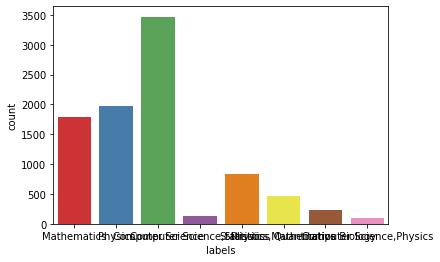

In [ ]:
sns.countplot(df_final["labels"],  palette='Set1')

In [ ]:
df['label'].str.join(sep='*').str.get_dummies(sep='*')

In [ ]:
df_final=df_final["labels"].str.get_dummies(",") 

,Computer Science,Mathematics,Physics,Quantitative Biology,Statistics
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
5995,0,1,0,0,0
5996,0,1,0,0,0
5997,0,1,0,0,0
5998,0,1,0,0,0


In [ ]:
df_final=pd.get_dummies(df_final,prefix='',prefix_sep='',columns=["labels"],drop_first=True)

In [ ]:
df_final.head()

,ID,"Computer Science,Physics","Computer Science,Statistics",Mathematics,Physics,"Physics,Mathematics",Quantitative Biology,Statistics
0,20973,0,0,1,0,0,0,0
1,20992,0,0,1,0,0,0,0
2,20994,0,0,1,0,0,0,0
3,21342,0,0,1,0,0,0,0
4,21423,0,0,1,0,0,0,0


In [ ]:
df_final.columns

Index(['ID', 'Computer Science', 'Mathematics', 'Physics',
       'Quantitative Biology', 'Statistics'],
      dtype='object')

In [ ]:
df_final['Quantitative Finance']=pd.DataFrame(np.zeros(shape=(len(df_final),1),dtype=np.int), index=df_final.index)

In [ ]:
df_final = df_final[["ID",'Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']]

In [ ]:
df_final.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,1,0,0,0
1,20992,0,0,1,0,0,0
2,20994,0,0,1,0,0,0
3,21342,0,0,1,0,0,0
4,21423,0,0,1,0,0,0


In [ ]:
df_final.reset_index(drop=True, inplace=True)

In [ ]:
df_final.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,1,0,0,0
1,20992,0,0,1,0,0,0
2,20994,0,0,1,0,0,0
3,21342,0,0,1,0,0,0
4,21423,0,0,1,0,0,0


In [ ]:
result = df_final.sort_values(by=['ID'], ascending=[True])

In [ ]:
result.head(10)

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,1,0,0,0
69,20974,0,1,0,0,0,0
458,20975,1,0,0,0,0,0
70,20976,0,1,0,0,0,0
584,20977,0,0,1,0,0,0
741,20978,1,0,0,0,0,0
871,20979,0,0,0,1,0,0
1307,20980,1,0,0,0,0,0
1604,20981,1,0,0,0,0,0
71,20982,0,1,0,0,0,0


In [ ]:
result.to_csv('result.csv') 
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>